In [26]:
from laonlp import word_tokenize
import pandas as pd
import numpy as np
import re

In [3]:
filename = pd.read_csv('Data\QnA.csv', header=None)

X = filename.iloc[:, 0].values
Y = filename.iloc[:, 1].values

# Create Vocabulary

In [4]:
word2count = []

for question in X:
    question = word_tokenize(question)
    for tokens in question:
        word2count.append(tokens)

for answer in Y:
    answer = word_tokenize(answer)
    for tokens in answer:
        word2count.append(tokens)          

In [5]:
from collections import Counter

word2count = sorted(Counter(word2count))

In [6]:
vocab = {}

word_num = 1
for word in word2count:
    vocab[word] = word_num
    word_num += 1

In [7]:
tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    x += 1
    vocab[token] = x

In [8]:
vocab['<PAD>'] = 0

In [9]:
inv_vocab = {w:v for v, w in vocab.items()}
inv_vocab

{1: ' ',
 2: '#',
 3: '(',
 4: ')',
 5: '),',
 6: '+',
 7: ',',
 8: '-',
 9: '.',
 10: '/',
 11: '0',
 12: '020',
 13: '021',
 14: '1',
 15: '1,220,000',
 16: '1,255,000',
 17: '1,290,000',
 18: '1,360,000',
 19: '1,570,000',
 20: '1,605,000',
 21: '1,640,000',
 22: '1,675,000',
 23: '1,710,000',
 24: '10',
 25: '100',
 26: '11.45',
 27: '11:30',
 28: '13.00',
 29: '137',
 30: '13:00',
 31: '14',
 32: '143',
 33: '144',
 34: '15',
 35: '15,950,000',
 36: '16',
 37: '16.45',
 38: '16:30',
 39: '17',
 40: '173',
 41: '18',
 42: '19',
 43: '2',
 44: '2,860,000',
 45: '2.00',
 46: '2.50',
 47: '20',
 48: '2004',
 49: '2005',
 50: '21',
 51: '210,000',
 52: '22',
 53: '22245128',
 54: '23232378',
 55: '25,300,000',
 56: '26',
 57: '27',
 58: '28',
 59: '29',
 60: '3',
 61: '3.0',
 62: '3.00',
 63: '30',
 64: '30,000',
 65: '310,000',
 66: '35,000',
 67: '36',
 68: '37',
 69: '38',
 70: '39',
 71: '4',
 72: '40',
 73: '46',
 74: '49',
 75: '5',
 76: '50',
 77: '54',
 78: '55',
 79: '550,000'

In [10]:
import pickle

pickle.dump(inv_vocab, open("backend/model/vocabulary.pkl", "wb"))

# Clean Question

In [11]:
def remove_special_character(text):
    return re.sub(r'[^0-9a-zA-Zກຂຄງຈສຊຍດຕຖທນບປຜຝພຟມຢລຫຼຣວຫອຮໜໝໆຽະາ ິ ີ ຶ ື ໂ ໍເແ ຸ ູຳໄໃ ັ ົ ່ ້ ໌+]', '', text)

def remove_spaces(text):
    
    return text.replace(" ", "")

In [12]:
stop_words = ['ໃຜ','ເປັນ','ຂຶ້ນ','ໃນ','ໃດ','ແດ່','ການ','ຄົນ','ຂອງ','ແມ່ນ','ຫຍັງ','ຂໍ','ກັບ','ແນວໃດ','ໄດ້','ເກຣດ','ມີ',
              'ໂທ','ບໍ','ຜູ້','ແລ້ວ','ແນ່','ມາ','ຖ້າ','ຢາກ','ສາຍ','ໂຕ','ເບິ່ງ','ຈະ','ເຂົ້າ','ຕ້ອງ','ສາມາດ','ຫຼັງຈາກ','ຕິດຕໍ່',
              'ອີກ','ຍັງ','ຕໍ່','ທີ','ລາຄາ','ອາທິດ','ເທົ່າໃດ','ເສຍ','ກ່ຽວກັບ','ໃຊ້', 'ເວລາ','ຕາມ','ສືບຕໍ່','ໄປ','ລະດັບ','ຈາກ',
              'ເຮັດ','ວ່າ','ທັງໝົດ','ຈັດ','ຈັດການ','ຫຼື','ຈຶ່ງ','ທີ່','ໄວ້','ຢູ່','ລວມ']

In [13]:
clean_x = [remove_spaces(i) for i in X]
clean_x = [remove_special_character(i) for i in clean_x]
clean_x = [word_tokenize(i) for i in clean_x]

In [14]:
X = []
for tokens in clean_x:
    token = [i for i in tokens if i not in stop_words]

    X.append(token)   

In [15]:
keyword = []
for sentence in X:
    for token in sentence:
        keyword.append(token)

In [16]:
from collections import Counter

keyword_list = sorted(Counter(keyword))
print(keyword_list)

['1', '2', '3', '4', 'A', 'AI', 'B', 'B+', 'C', 'C+', 'D', 'D+', 'F', 'ກຳນົດ', 'ຂອບໃຈ', 'ຂໍໂທດ', 'ຄວາມຮູ້', 'ຄອມພິວເຕີ', 'ຄະແນນ', 'ຄັດເລືອກ', 'ຄ່າ', 'ຈັກ', 'ຈື່ງ', 'ຈົບ', 'ຈົບຊັ້ນສູງ', 'ຈ່າຍ', 'ຊອບແວ', 'ຊັ້ນສູງ', 'ຊາດ', 'ຊື່', 'ຊ່ອງທາງ', 'ຕໍ່ເນື່ອງ', 'ທັດສະນະ', 'ທຳນຽມ', 'ທຶນ', 'ທົ່ວໄປ', 'ນັກພັດທະນາ', 'ນັກສຶກສາ', 'ນາໆ', 'ບັງຄັບ', 'ບໍ່', 'ປະກາສະນີຍະບັດ', 'ປະລິນຍາຕີ', 'ປະລິນຍາເອກ', 'ປະລິນຍາໂທ', 'ປັດຈຸບັນ', 'ປິ', 'ປີ', 'ຜ່ານ', 'ພະນັກງານ', 'ພັດທະນາ', 'ພາກ', 'ພາກຮຽນ', 'ພາຍຫຼັງ', 'ພາສາ', 'ພື້ນຖານ', 'ຟີ', 'ລາວ', 'ວັນ', 'ວັນອາທິດ', 'ວັນເສົາ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ວິທະຍາສາສາດ', 'ສອບເສັງ', 'ສະບາຍດີ', 'ສະເພາະ', 'ສາຂາ', 'ສຳພາດ', 'ສຶກສາ', 'ສ້າງ', 'ຫາ', 'ຫຸ່ນຍົນ', 'ຫົວໜ້າ', 'ຫຼັກສູດ', 'ອັງກິດ', 'ອີເມວ', 'ອື່ນ', 'ຮອງ', 'ຮັບຜິດຊອບ', 'ຮຽນ', 'ເກມ', 'ເງື່ອນໄຂ', 'ເບີ', 'ເພີ່ມ', 'ເລກ', 'ເລືອກ', 'ເວັບໄຊ', 'ເສັງ', 'ເຮັດວຽກ', 'ແບ່ງ', 'ແຮັກເກີ', 'ໂປຣແກຣມ', 'ໂມງ', 'ໜ່ວຍກິດ', 'ໜ່ວຍງານ', 'ໝວດ']


In [24]:
import pickle

pickle.dump(keyword_list, open("backend\model\keyword.pkl", "wb"))

# Clean Answer

In [18]:
for i in range(len(Y)):
    Y[i] = '<SOS>' + Y[i] + '<EOS>'

In [19]:
clean_y = [word_tokenize(i) for i in Y]

# Encoder Input

In [20]:
enc_in = []

for i in X:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    enc_in.append(lst)  

# Decoder Input

In [21]:
dec_in = []
for i in clean_y:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    dec_in.append(lst)

In [22]:
enc_max_len = max(len(seq) for seq in enc_in)
dec_max_len = max(len(seq) for seq in dec_in)

In [23]:
from keras.preprocessing.sequence import pad_sequences

enc_in = pad_sequences(enc_in, enc_max_len, padding='post', truncating='post')
dec_in = pad_sequences(dec_in, dec_max_len, padding='post', truncating='post')

In [25]:
import pickle

pickle.dump(enc_in, open("backend\model\question.pkl", "wb"))

# Decoder Output

In [27]:
dec_out = np.zeros_like(dec_in)
dec_out[:, :-1] = dec_in[:, 1:]
target_out = np.expand_dims(dec_out, -1)

# Model

In [28]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, TimeDistributed, Input

enc_inp = Input(shape=(enc_max_len, ))
dec_inp = Input(shape=(dec_max_len, ))

In [29]:
VOCAB_SIZE = len(vocab) + 1

In [30]:
enc_embed = Embedding(VOCAB_SIZE, 128)(enc_inp)
enc_lstm = LSTM(256, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]

In [31]:
dec_embed = Embedding(VOCAB_SIZE, 128)(dec_inp)
dec_lstm = LSTM(256, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)
dense = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'))
dec_op = dense(dec_op)

In [32]:
model = Model([enc_inp, dec_inp], dec_op)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 147)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 15, 128)              89984     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 147, 128)             89984     ['input_2[0][0]']             
                                                                                              

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp, target_train, target_temp = train_test_split(enc_in, dec_in, target_out, test_size=0.2, random_state=42) 

In [34]:
X_val, X_test, Y_val, Y_test, target_val, target_test = train_test_split(X_temp, Y_temp, target_temp, test_size=0.5, random_state=42)

In [41]:
history = model.fit([X_train, Y_train], target_train, validation_data=([X_val, Y_val], target_val), epochs=250)

Epoch 1/250
21/21 [==============================] - 10s 338ms/step - loss: 3.3737 - accuracy: 0.7056 - val_loss: 1.7222 - val_accuracy: 0.7526
Epoch 2/250
21/21 [==============================] - 6s 311ms/step - loss: 1.7199 - accuracy: 0.7419 - val_loss: 1.6239 - val_accuracy: 0.7526
Epoch 3/250
21/21 [==============================] - 6s 301ms/step - loss: 1.6464 - accuracy: 0.7419 - val_loss: 1.5649 - val_accuracy: 0.7526
Epoch 4/250
21/21 [==============================] - 6s 304ms/step - loss: 1.5132 - accuracy: 0.7476 - val_loss: 1.3070 - val_accuracy: 0.7706
Epoch 5/250
21/21 [==============================] - 6s 306ms/step - loss: 1.2532 - accuracy: 0.7748 - val_loss: 1.1243 - val_accuracy: 0.7940
Epoch 6/250
21/21 [==============================] - 6s 306ms/step - loss: 1.1245 - accuracy: 0.7996 - val_loss: 1.0611 - val_accuracy: 0.8094
Epoch 7/250
21/21 [==============================] - 6s 305ms/step - loss: 1.0801 - accuracy: 0.8043 - val_loss: 1.0315 - val_accuracy: 0.811

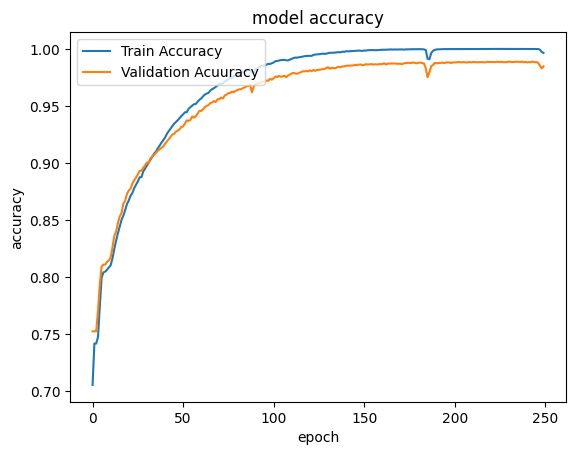

In [42]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy','Validation Acuuracy'], loc='upper left')
plt.show()

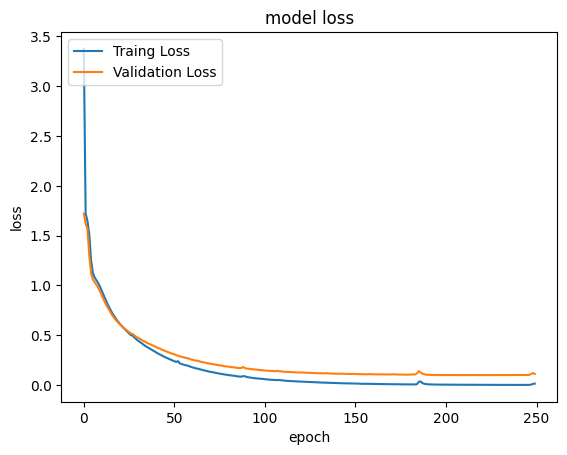

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Traing Loss','Validation Loss'], loc='upper left')
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate([X_test, Y_test], target_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

3/3 [==============================] - 0s 74ms/step - loss: 0.1416 - accuracy: 0.9848
Test Loss: 0.14159557223320007
Test Accuracy: 0.9847748875617981


# Inference Model

In [45]:
from keras.models import Model
from keras.layers import Input

In [46]:
enc_model = Model(enc_inp, enc_states)

In [47]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_lstm_outputs, state_h, state_c = dec_lstm(dec_embed, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = dense(decoder_lstm_outputs)
dec_model = Model([dec_inp] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [61]:
enc_model.save('backend\model\encoder_model.keras')
dec_model.save('backend\model\decoder_model.keras')